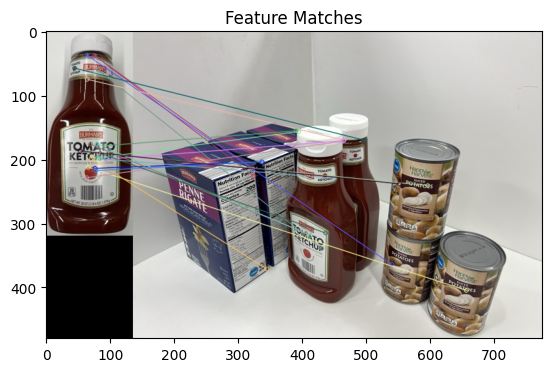

Detected Objects: 9


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the main image
main_image = cv2.imread('IMG_98.jpeg')
main_image_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

# Load the template image (Whether it be Ketchup Small (KS), Potato Small (PS), Box Small (BS))
template_image = cv2.imread('KS.jpeg')
template_image_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)

# Initialize ORB for Feature Detection
orb = cv2.ORB_create()

# Detect keypoints and descriptors in both images with ORB
keypoints_main, descriptors_main = orb.detectAndCompute(main_image_gray, None)
keypoints_template, descriptors_template = orb.detectAndCompute(template_image_gray, None)

# Match features using the BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_template, descriptors_main)

# Sort matches by distance lower distance = better matches
matches = sorted(matches, key=lambda x: x.distance)

matched_image = cv2.drawMatches(
    template_image, keypoints_template,
    main_image, keypoints_main,
    matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Display the matched image
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title("Feature Matches")
plt.show()

# Extract matched keypoints
src_pts = np.float32([keypoints_template[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_main[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Estimate homography matrix to filter inliers
matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Count matches based on inliers
inlier_matches = mask.ravel().tolist()
object_count = sum(inlier_matches)
print(f"Detected Objects: {object_count}")
